# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

## The Hyperplane

A hyperplane is a subspace of its ambient space, and defined as:

$$
H = \{x: w^Tx + b = 0 \}
$$

* Examples, if a space is 3-dimensional then it's hyperplanes are 2-dimensional planes, while if the space is 2-dimensional plane, its hyperplanes are 1-dimensional lines.
* The hyperplane is perpendicular to the vector $w$

$b$ is the bias term. Without $b$, the hyperplane that $w$ defines would always have to go though the origin. We can get rid of $b$ by adding one additional constant dimension:

$$
x \rightarrow \begin{bmatrix} x \\ 1 \end{bmatrix} \\
w \rightarrow \begin{bmatrix} w \\ b \end{bmatrix} \\
\begin{bmatrix} x \\ 1 \end{bmatrix} \begin{bmatrix} w \\ b \end{bmatrix} = w^Tx + b
$$


**The classifier**

A binary classifier with $y \in C = \{-1, +1 \}$ can be defined as:

$$
h(x) = sign(w^Tx + b) \\
y_i(w^Tx_i + b) > 0 \Leftrightarrow x_i \text{ is classified correctly}
$$



In [3]:
# Find an example of w and b for the below demo
w = np.array([-1, 1])
b = -6

# Logistic Regression result
# w = np.array([-1.6088516 ,  0.26800105])
# b = -3.52428733

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102)

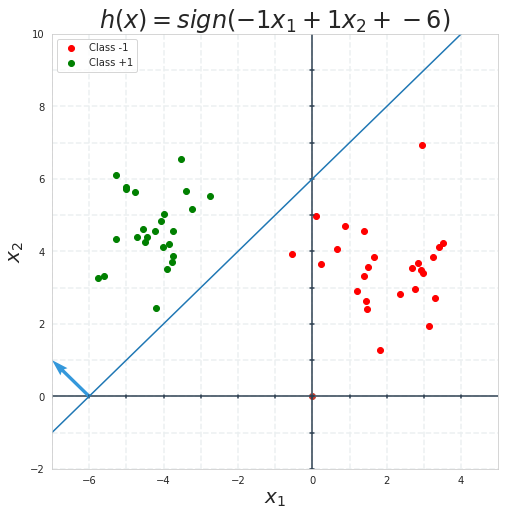

In [5]:
#@title Hyperplane example {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Hyperplane example

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

draw_vectors(np.array([w]), origin=np.array([[(-b/w[0]), 0]]))
x_1 = np.linspace(-8, 8, 100)
plt.plot(x_1, (-w[0]/w[1])*x_1 + (-b/w[1]))

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.title(r'$h(x) = sign({}x_1 + {}x_2 + {})$'.format(w[0], w[1], b), fontsize=24)
plt.legend()
plt.show()

## The sigmoid function

$$
\sigma(z) = \frac{1}{1 + e^{-z}} \\
\sigma' = \sigma(1 - \sigma)
$$



* The sigmoid function has the S-shaped curve or sigmoid curve. 
* For any $z \in R$, $\sigma(z)$ returns a value between 0 and 1

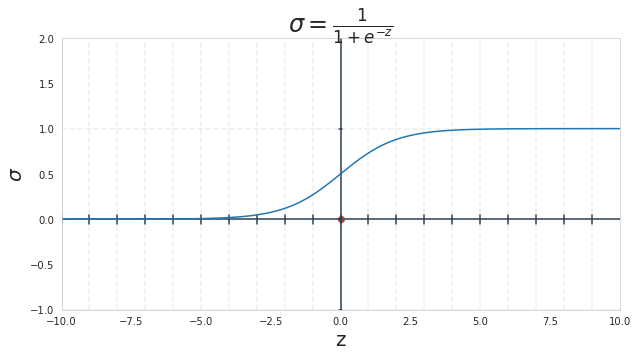

In [6]:
def sigmoid(z):
    return 1./(1 + np.exp(-z))

z = np.linspace(-10, 10, 1000)
s = sigmoid(z)

plt.figure(figsize=(10, 5))
draw_grid(x_lim=np.array([-10, 10]), y_lim=np.array([-1, 2]))
plt.plot(z, s)
plt.title(r'$\sigma = \frac{1}{1+e^{-z}}$', fontsize=24)
plt.xlabel('z', fontsize=20)
plt.ylabel(r'$\sigma$', fontsize=20)
plt.show()

## Definition

Logistic Regression solves **classification** problems. Logistic Regression assumes that $P(y^{(i)}=1|x^{(i)})$ takes on exactly this form:

$$
P(y^{(i)}=1|x^{(i)}) = \frac{1}{1 + e^{-(w^Tx^{(i)} + b)}} = \hat{y}^{(i)}
$$

so,

$$
P(y^{(i)}=0|x^{(i)}) = 1 - P(y^{(i)}=1|x^{(i)}) = \frac{e^{-(w^Tx^{(i)} + b)}}{1 + e^{-(w^Tx^{(i)} + b)}} = 1 - \hat{y}^{(i)}
$$



For binary classification we have the **Bernoulli(p)** distribution (one if a coin with heads probability p comes up heads, zero otherwise):
$$
f(y;p) = \begin{cases}
    p & if\ y = 1 \\
    1−p & if\ y = 0
\end{cases} \\
\text{or} \\
f(y) = p^y(1-p)^{1-y}
$$

so we can rewrite $P(y|X)$ as

$$
P(y|X) = \hat{y}^{y}(1 - \hat{y})^{1-y}
$$

**The computation graph**

<div align="center">
    <img src="https://i.imgur.com/pTBwCM2.png" width="600" />
</div>


For one sample $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = \sigma(z^{(i)})\tag{2}$$ 

For the entire dataset:

$$Z = Xw + b \tag{3} $$
$$\hat{y} = \sigma(Z) = \sigma(Xw + b) \tag{4} $$


## Maximum likelihood estimate (MLE)

From the definition of supervised learning:

The data points $(x^{(i)}, y^{(i)})$ are drawn from some distribution $P(X, Y)$. Ultimately we would like to learn a function $h$ such that for a new pair $(x, y) \sim P$, we have $h(x) \approx y$ with high probability.

In MLE we choose parameters that maximize the connditional likelihood. The conditional likelihood $P(y|X,w)$ is the probability of the observed values $y \in R^m$ in the training data conditioned on the feature values $x^{(i)}$ in $X = [x^{(1)}, x^{(2)}, \dots, x^{(m)}]^T \in R^{m \times n}$. We choose the parameters $w$ that maximize:

$$
\begin{array}
  0 P(y|X,w) = \prod_{i=1}^m{P(y^{(i)}|x^{(i)},w)} & \text{assume that $y^{(i)}$ is independent given the input $x^{(i)}$ and $w$ } 
\end{array}
$$
<br/>
$$
log \Big( \prod_{i=1}^m{P(y^{(i)}|x^{(i)},w)} \Big) = \sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \\
w_{MLE} = argmax_w \sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)}  \\
w_{MLE} = argmin_w -\frac{1}{m} \sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)}  \\
$$

**The loss function**

$$
J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)}
$$

is also called **binary cross entropy**.

## Gradient Descent

**Forward Propagation:**
$$Z = Xw + b$$
$$\hat{y} = \sigma(Z) =\sigma(Xw + b) $$
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \tag{5}$$

**and Backward**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{y}-y)\tag{6}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$

**Discussion**: Prove the fomulas (6) and (7)

**Prove (6)**:

$$
\frac{dJ}{dw_j} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{dw_j}
$$

For $j \in {1 \dots n}$

Solving $\frac{dJ}{d\hat{y}}$:

$$
\frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)}}{\hat{y}^{(i)}} - \frac{(1-y^{(i)})}{1-\hat{y}^{(i)}}} \\
\Rightarrow \frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)}(1-\hat{y}^{(i)}) - (1-y^{(i)})\hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}} \\
$$

$$
\Rightarrow \frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)} - \hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}} \tag{8} \\
$$

Solving $\frac{d\hat{y}}{dZ}$:

$$
\frac{d\hat{y}}{dZ} = \hat{y}(1 - \hat{y}) \tag{9}
$$

because $\hat{y} = sigmoid(Z)$

Solving $\frac{dZ}{dw_j}$:

$$
\frac{dZ}{dw_j} = x_j
$$

So,

$$
\frac{dJ}{dw_j} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{dw_j} \\
\Rightarrow \frac{dJ}{dw_j} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)} - \hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})} \hat{y}^{(i)}(1 - \hat{y}^{(i)}) x^{(i)}_j } = \frac{-1}{m} \sum_{i=1}^m {(y^{(i)} - \hat{y}^{(i)}) x^{(i)}_j } \\
\Rightarrow \frac{dJ}{dw} = \frac{1}{m}X^T(\hat{y}-y)
$$

**Prove (7):**

$$
\frac{dJ}{db} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{db}
$$

Because

$$
\frac{dZ}{db} = 1
$$

and based on (8) and (9), we have

$$
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})
$$

## Implement with sklearn

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X, y)
predictions = lg.predict(X)
# Show metrics
print("Accuracy score: %f" % accuracy_score(y, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))

# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Accuracy score: 1.000000
Confusion Matrix:
[[25  0]
 [ 0 25]]
w =  [[-1.6088516   0.26800105]]
b =  [-3.52428733]


## Model Evaluation - The Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

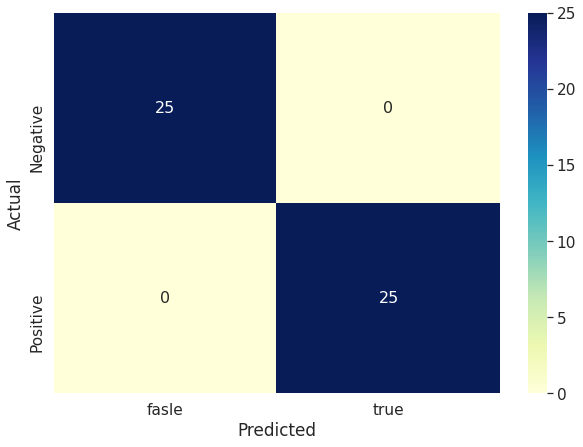

In [9]:
y_true = ['Negative', 'Positive']
y_pred = ['true', 'fasle']
data = confusion_matrix(y, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_pred), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

**Type 1 and Type 2 errors**

![alt text](https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg)

source: https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/

### Terminologies

**Recall, sensitivity, hit rate, or true positive rate(TPR)**

$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

**precision or positive predictive value (PPV)**

$$
PPV = \frac{TP}{TP + FP}
$$

**accuracy (ACC)**

$$
ACC = \frac{TP + TN}{P + N}
$$

**F1 score**: the **harmonic mean** of **precision** and **recall**

$$
F_1 = 2 \frac{Precision . Recall}{Precision + Recall}
$$

In [42]:
# sklearn classification_report
from sklearn.metrics import classification_report

y_true = [1, 1, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0]

# TP = 2
# TN = 1
# FP = 1
# FN = 2
# PPV = 2/3
# Recall = 2/4
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6

